## Project Description
Projek yang akan dilakukan kali ini adalah menganalisis sebuah Dataset NYC Property Sales September 2016 - 2017. Pada projek ini akan dilakukan kalkulasi dan beberapa perhitungan terhadap dataset

### Persiapan dan Import Library

In [91]:
# Library untuk proses data
import pandas as pd
import numpy as np

# Library untuk plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Library scipy untuk operasi perhitungan
import scipy.stats as scistats

### Data Loading

In [92]:
df_nyc_sales = pd.read_csv('dataset/nyc-rolling-sales.csv')

In [93]:
df_nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### Data Pre-processing

In [94]:
df_nyc_sales.shape

(84548, 22)

In [95]:
df_nyc_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


In [96]:
# Melakukan pengecekan tipe data
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [97]:
# Melakukan pengecekan missing value pada dataset
df_nyc_sales.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### Data Cleaning

In [98]:
# Melakukan loading data ulang untuk mencari missing value yang tidak terdeteksi
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_nyc_sales = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values=missing_values)

In [99]:
# Mengganti angka 0 agar menjadi missing value yang terbaca
df_nyc_sales['YEAR BUILT']=df_nyc_sales['YEAR BUILT'].replace({0:np.nan})
df_nyc_sales['ZIP CODE']=df_nyc_sales['ZIP CODE'].replace({0:np.nan})
df_nyc_sales['TOTAL UNITS']=df_nyc_sales['TOTAL UNITS'].replace({0:np.nan})

In [100]:
# Cek ulang missing value pada data
df_nyc_sales.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

### Dropping Data

In [101]:
# Melakukan drop pada data yang sekiranya tidak dibutuhkan pada operasi perhitungan
drop_columns = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df_nyc_sales.drop(drop_columns,inplace=True, axis=1)

In [102]:
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


### Dealing with Missing Values

In [103]:
# Mengganti missing value pada kolom kategori dengan nilai modus pada data
categoricals_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoricals_columns:
    df_nyc_sales[cat_col].fillna(df_nyc_sales[cat_col].mode()[0],inplace=True)

In [104]:
# Mengganti missing value pada kolom numerik dengan nilai median pada data
num_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in num_columns:
    df_nyc_sales[float_col].fillna(df_nyc_sales[float_col].median(),inplace=True)

In [105]:
# Menghapus missing value lainnya
df_nyc_sales.dropna(inplace=True)

### Duplicate Checking

In [106]:
rows_duplicated = df_nyc_sales.duplicated()
print(rows_duplicated.sum())

367


In [107]:
# Menghapus data duplikat yang ada
df_nyc_sales.drop_duplicates(subset=df_nyc_sales.columns,keep='first', inplace=True)

In [108]:
rows_duplicated = df_nyc_sales.duplicated()
print(rows_duplicated.sum())

0


### Data Type

In [109]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  int64  
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  float64
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               

In [110]:
# Melakukan perubahan tipe data yang sesuai pada data
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
int_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in int_columns:
    df_nyc_sales[col] = df_nyc_sales[col].astype('int64')

In [111]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51996 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         51996 non-null  object 
 1   NEIGHBORHOOD                    51996 non-null  object 
 2   BUILDING CLASS CATEGORY         51996 non-null  object 
 3   TAX CLASS AT PRESENT            51996 non-null  object 
 4   BLOCK                           51996 non-null  int64  
 5   LOT                             51996 non-null  int64  
 6   BUILDING CLASS AT PRESENT       51996 non-null  object 
 7   ZIP CODE                        51996 non-null  object 
 8   RESIDENTIAL UNITS               51996 non-null  int64  
 9   COMMERCIAL UNITS                51996 non-null  int64  
 10  TOTAL UNITS                     51996 non-null  float64
 11  LAND SQUARE FEET                51996 non-null  float64
 12  GROSS SQUARE FEET               

In [112]:
# Mengganti nilai BOROUGH menjadi string nama wilayah
df_nyc_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

### Update Index

In [113]:
df_nyc_sales.index = range(0,len(df_nyc_sales))

### Measure of Central Tendencys

In [114]:
# Mean
print("Mean SALE PRICE = ", df_nyc_sales['SALE PRICE'].mean())
print("Mean GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].mean())
print("Mean LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].mean())

Mean SALE PRICE =  1414615.5226555888
Mean GROSS SQUARE FEET =  3496.1654165705054
Mean LAND SQUARE FEET =  3225.3419493807214


In [115]:
# Median
print("Median SALE PRICE = ",df_nyc_sales['SALE PRICE'].median())
print("Median GROSS SQUARE FEET = ", df_nyc_sales['GROSS SQUARE FEET'].median())
print("Median LAND SQUARE FEET = ", df_nyc_sales['LAND SQUARE FEET'].median())

Median SALE PRICE =  572256.0
Median GROSS SQUARE FEET =  1680.0
Median LAND SQUARE FEET =  2325.0


In [116]:
# Modus
print("Modus BUILDING CLASS CATEGORY = ",df_nyc_sales['BUILDING CLASS CATEGORY'].mode()[0])
print("Modus BOROUGH = ",df_nyc_sales['BOROUGH'].mode()[0])
print("Modus BUILDING CLASS AT TIME OF SALE = ",df_nyc_sales['BUILDING CLASS AT TIME OF SALE'].mode()[0])

Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus BOROUGH =  Brooklyn
Modus BUILDING CLASS AT TIME OF SALE =  R4


### Measure of Spread

In [117]:
# Range
print('Range SALE PRICE = ', (df_nyc_sales['SALE PRICE'].max() - df_nyc_sales['SALE PRICE'].min()))
print('Range GROSS SQUARE FEET = ', (df_nyc_sales['GROSS SQUARE FEET'].max() - df_nyc_sales['GROSS SQUARE FEET'].min()))
print('Range LAND SQUARE FEET = ', (df_nyc_sales['LAND SQUARE FEET'].max() - df_nyc_sales['LAND SQUARE FEET'].min()))

Range SALE PRICE =  2210000000.0
Range GROSS SQUARE FEET =  3750565.0
Range LAND SQUARE FEET =  4228300.0


In [118]:
# Variance
print('Sampel Variance dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1))
print('Sampel Variance dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1))
print('Sampel Variance dari LAND SQUARE FEET = ', df_nyc_sales['LAND SQUARE FEET'].var(ddof=1))

Sampel Variance dari SALE PRICE =  168431321559454.84
Sampel Variance dari GROSS SQUARE FEET =  766179686.4028512
Sampel Variance dari LAND SQUARE FEET =  674540349.8475266


In [119]:
# Standard Deviation
print('Sampel Standard Deviation dari SALE PRICE = ', df_nyc_sales['SALE PRICE'].var(ddof=1)**0.5)
print('Sampel Standard Deviation dari GROSS SQUARE FEET = ', df_nyc_sales['GROSS SQUARE FEET'].var(ddof=1)**0.5)
print('Sampel Standard Deviation dari LAND SQUARE FEET = ', df_nyc_sales['LAND SQUARE FEET'].var(ddof=1)**0.5)

Sampel Standard Deviation dari SALE PRICE =  12978109.321447976
Sampel Standard Deviation dari GROSS SQUARE FEET =  27679.950982667062
Sampel Standard Deviation dari LAND SQUARE FEET =  25971.9146357662


### Probability Distribution

In [120]:
# Handling outliers
# Kuartil 3
Q3 = df_nyc_sales.quantile(0.75)

# Kuartil 1
Q1 = df_nyc_sales.quantile(0.25)

# Menghitung nilai IQR
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df_nyc_sales[
    ~((df_nyc_sales < (Q1 - steps* IQR)) |(df_nyc_sales > (Q3 + steps * IQR))).any(axis=1)
]

# Update index setelah outlier dihilangkan
df_filtered.index = [i for i in range(len(df_filtered))]
df_nyc_sales = df_filtered

/var/folders/8k/5wzf43bs68dbx42d9h_wh6b00000gn/T/ipykernel_3582/351744351.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_nyc_sales.quantile(0.75)
/var/folders/8k/5wzf43bs68dbx42d9h_wh6b00000gn/T/ipykernel_3582/351744351.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_nyc_sales.quantile(0.25)
/var/folders/8k/5wzf43bs68dbx42d9h_wh6b00000gn/T/ipykernel_3582/351744351.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((df_nyc_sales < (Q1 - step

#### Normal Distribution

Text(0, 0.5, 'Frequency')

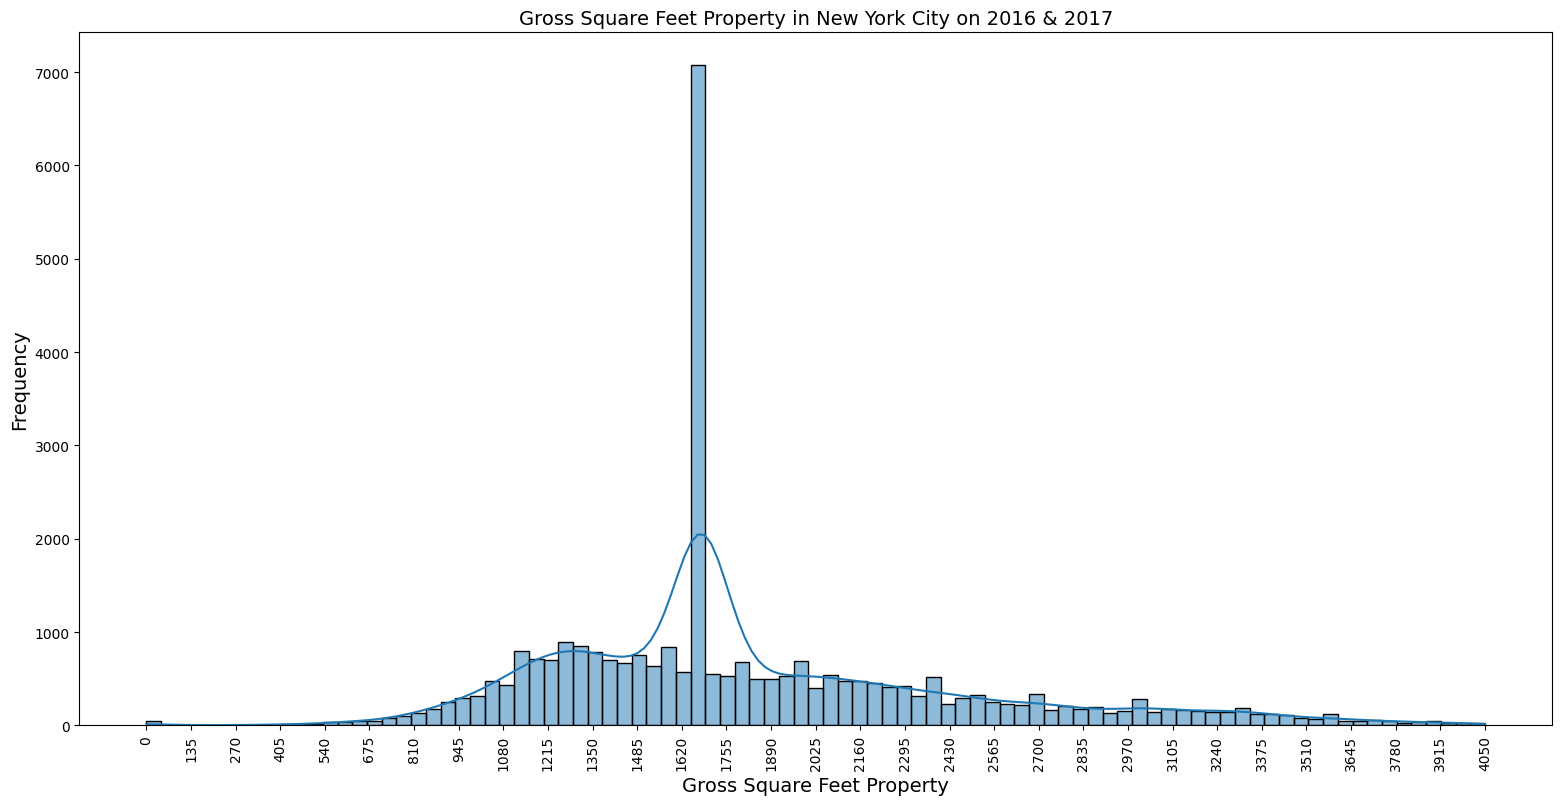

In [121]:
# Distribusi GROSS SQUARE FEET
df_gross_square_feet = df_nyc_sales['GROSS SQUARE FEET']
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edge_gross_square_feet = np.histogram(df_gross_square_feet,bins=30)
sns.histplot(df_gross_square_feet,kde=True, ax=ax)
ax.set_title('Gross Square Feet Property in New York City on 2016 & 2017', fontsize=14)
ax.set_xlabel('Gross Square Feet Property', fontsize=14)
ax.set_xticks(bin_edge_gross_square_feet)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frequency', fontsize=14)

In [122]:
# Menerapkan metode Central Limit Theorem
n = 100
m = 1000
sample_mean_gross_square_feet = []
for i in range(m):
    sample_values = np.random.choice(a=df_gross_square_feet,size=n)
    sample_mean_gross_square_feet.append(np.mean(sample_values))

Text(0, 0.5, 'Frequency')

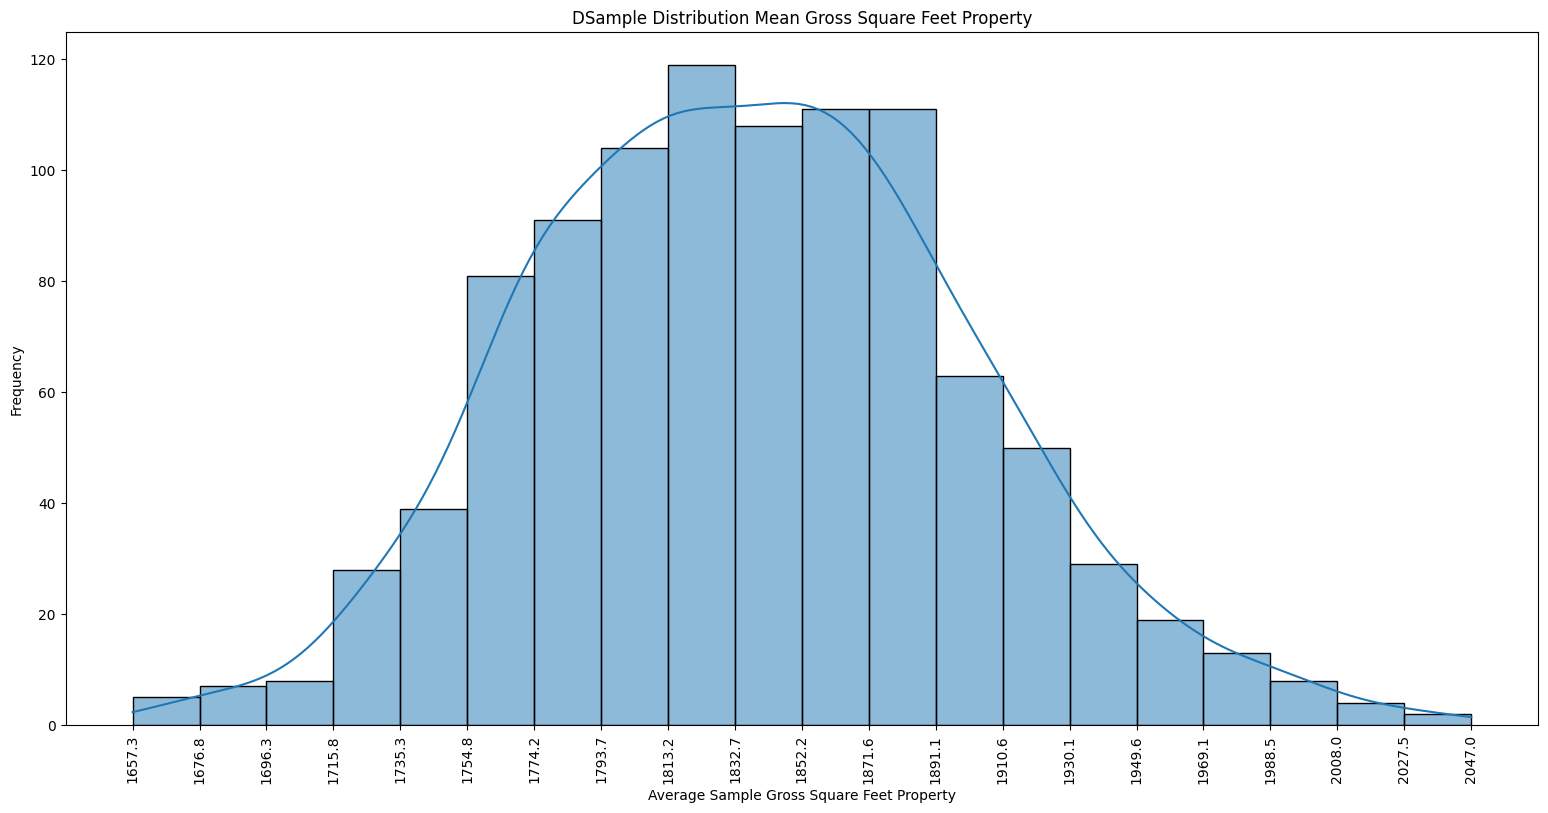

In [123]:
count, bin_edges = np.histogram(sample_mean_gross_square_feet, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_gross_square_feet,kde=True, bins=20, ax=ax)
ax.set_title('DSample Distribution Mean Gross Square Feet Property')
ax.set_xlabel('Average Sample Gross Square Feet Property')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frequency')

In [124]:
sample_means_series = pd.Series(sample_mean_gross_square_feet)

# Menghitung nilai rata-rata
print('Rata rata sampel mean GROSS SQUARE FEET = ', sample_means_series.mean())
# Menghitung nilai median
print('Median sampel mean GROSS SQUARE FEET = ', sample_means_series.median())
# Menghitung standar deviasi
print('Standar Deviasi sampel mean GROSS SQUARE FEET = ', sample_means_series.std())

Rata rata sampel mean GROSS SQUARE FEET =  1837.782
Median sampel mean GROSS SQUARE FEET =  1835.3400000000001
Standar Deviasi sampel mean GROSS SQUARE FEET =  63.79171931413241


In [125]:
# Menghitung standard error dari sample mean
pop_std_gross_square = df_gross_square_feet.std()
pop_mean_gross_square = df_gross_square_feet.mean()

# Menghitung jumlah seluruh populasi
number_of_observation = len(df_gross_square_feet)

standard_error_of_sampel_mean_gross_feet = pop_std_gross_square/np.sqrt(number_of_observation)

In [126]:
z_score = 1.96
lower_bound_gross_square = np.mean(sample_mean_gross_square_feet) - z_score*standard_error_of_sampel_mean_gross_feet
upper_bound_gross_square = np.mean(sample_mean_gross_square_feet) + z_score*standard_error_of_sampel_mean_gross_feet
lower_bound_gross_square, upper_bound_gross_square

(1830.8308996843937, 1844.7331003156062)

#### Kesimpulan


Berdasarkan hasil perhitungan diatas, nilai rata-rata dari luas total semua lantai bangunan properti (GROSS SQUARE FEET) di New York City dari tahun 2016 - 2017 berada dalam rentang (1829.532...) sampai (1843.434...) kaki.

### Confidence Intervals

In [127]:
# Menghitung rata-rata populasi
pop_mean_sale_price = df_nyc_sales['SALE PRICE'].mean()
pop_mean_sale_price

573835.3769552765

In [128]:
# Menghitung standar deviasi populasi
pop_std_sale_price = df_nyc_sales['SALE PRICE'].std()
pop_std_sale_price

448406.18615224387

Text(0, 0.5, 'Frequency')

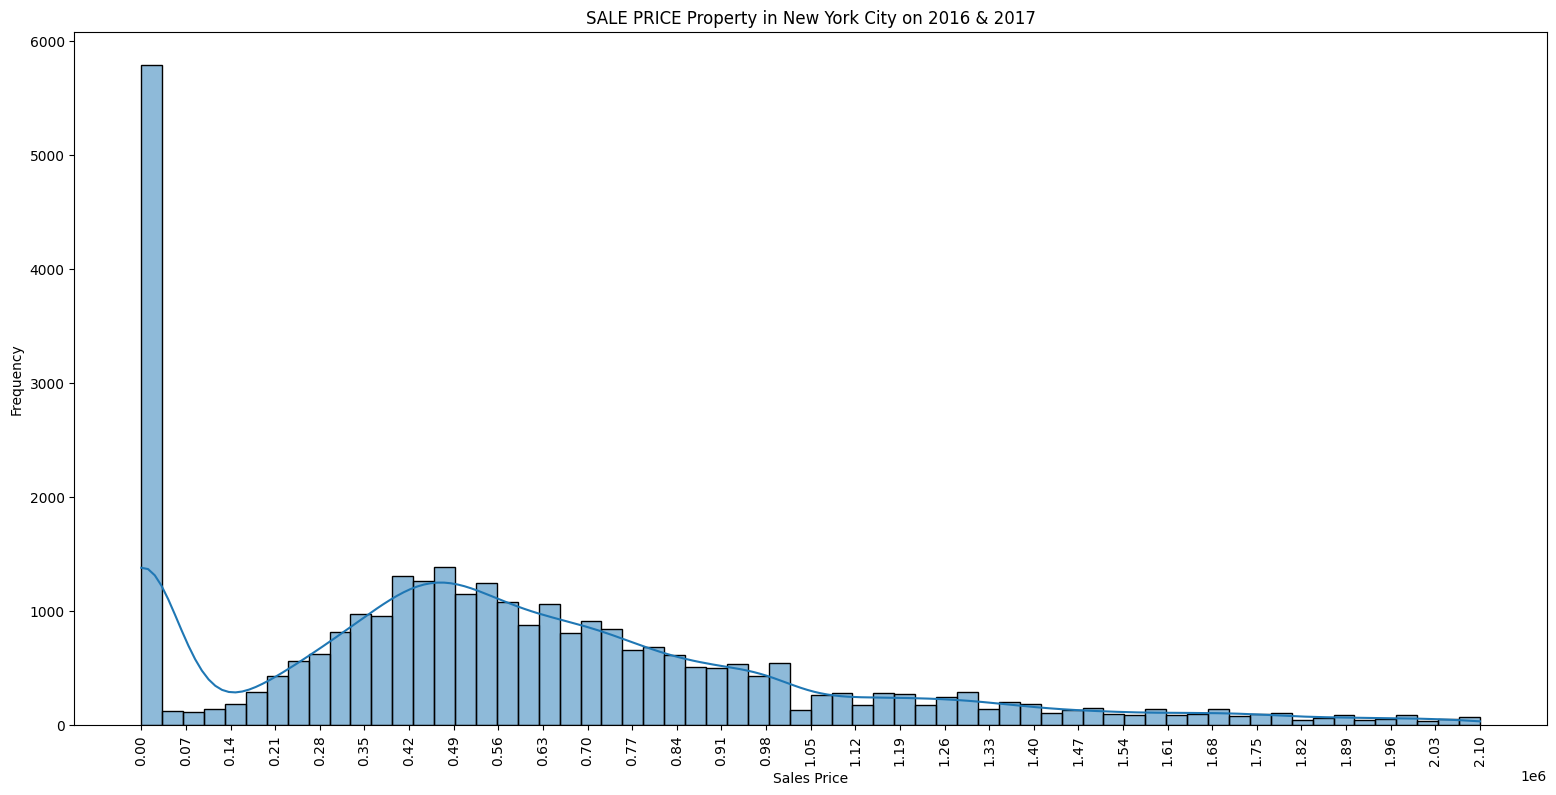

In [129]:
# Plotting for SALE PRICE
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edges_sale_price = np.histogram(df_nyc_sales['SALE PRICE'],bins=30)
sns.histplot(df_nyc_sales['SALE PRICE'],kde=True, ax=ax)
ax.set_title('SALE PRICE Property in New York City on 2016 & 2017')
ax.set_xlabel('Sales Price')
ax.set_xticks(bin_edges_sale_price)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frequency')

In [130]:
# Menerapkan perhitungan Central Limit Theorem
sample_means = []
n = 100
m = 1000

for sample in range(0,m):
    # Mengambil n nilai secara acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=df_nyc_sales['SALE PRICE'], size=n)
    
    # Menghitung mean
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(0, 0.5, 'Frequency')

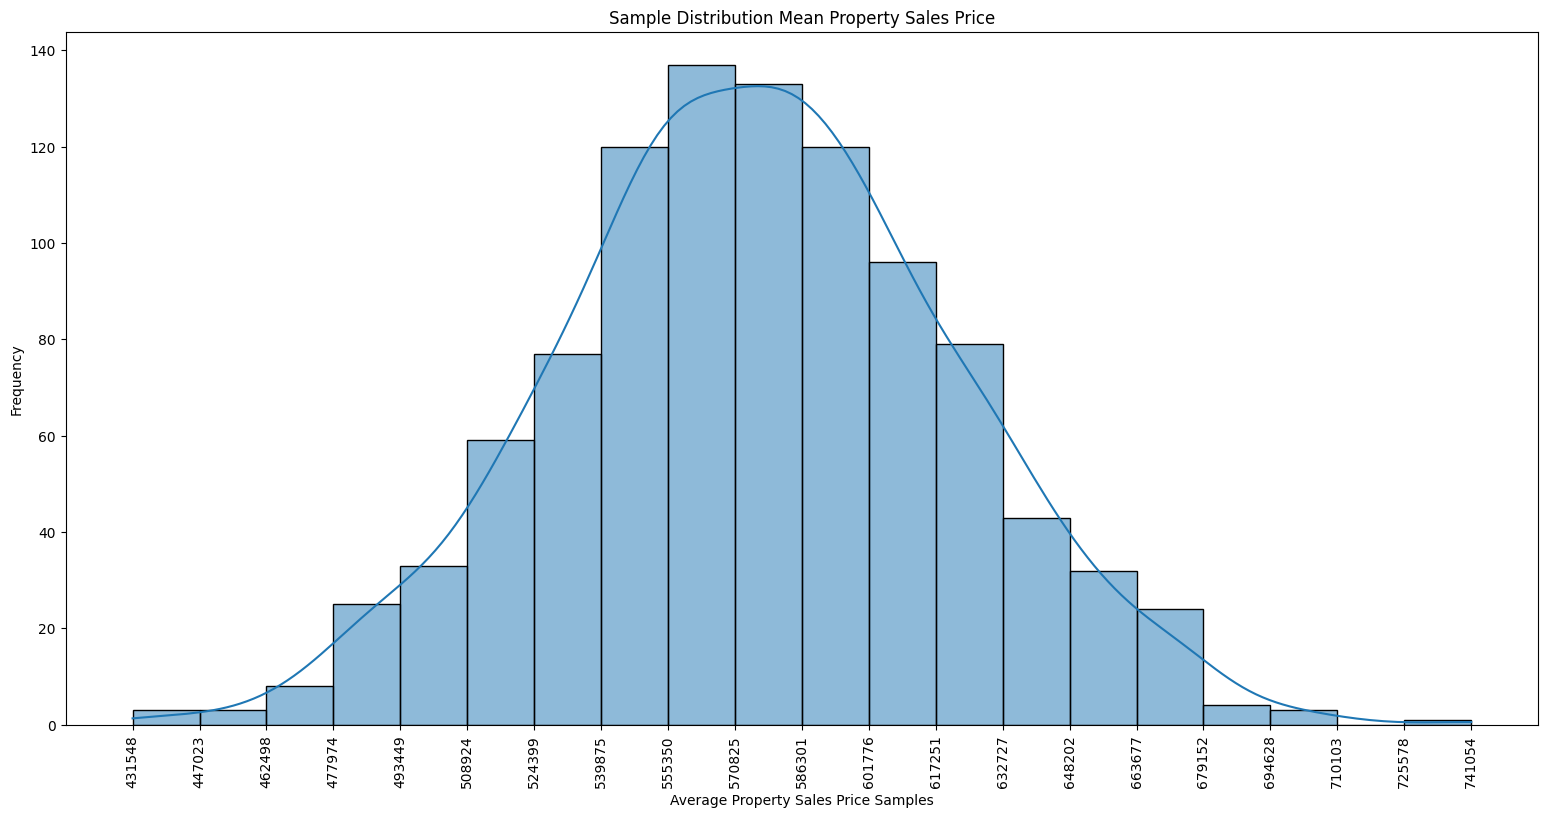

In [131]:
count, bin_edges = np.histogram(sample_means, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_means,kde=True, bins=20, ax=ax)
ax.set_title('Sample Distribution Mean Property Sales Price')
ax.set_xlabel('Average Property Sales Price Samples')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frequency')

In [132]:
sample_means_series = pd.Series(sample_means)

# Menghitung mean
print('Rata rata sampel mean SALE PRICE = ', sample_means_series.mean())
# Menghitung median
print('Median sampel mean SALE PRICE = ', sample_means_series.median())
# Menghitung standar deviasi
print('Standar Deviasi sampel mean SALE PRICE = ', sample_means_series.std())

Rata rata sampel mean SALE PRICE =  575763.6961599999
Median sampel mean SALE PRICE =  576308.87
Standar Deviasi sampel mean SALE PRICE =  45553.47202868301


In [133]:
# Menghitung mean dan standar deviasi menggunakan sample mean
mean_of_sampel_mean = np.mean(sample_means)
std_of_sampel_mean = np.std(sample_means)

In [134]:
z_score = 1.96

# Menghitung Standard error
number_of_observation = len(df_nyc_sales)
standard_error_of_sampel_mean = pop_std_sale_price/np.sqrt(number_of_observation)

In [135]:
lower_bound = mean_of_sampel_mean - z_score*standard_error_of_sampel_mean
upper_bound = mean_of_sampel_mean + z_score*standard_error_of_sampel_mean
lower_bound, upper_bound

(570833.1099649518, 580694.2823550481)

#### Kesimpulan
Berdasarkan perhitungan yang telah dilakukan, nilai rata-rata dari harga jual properti di New York City dari tahun 2016 - 2017 berada dalam rentang $569,580.526... sampai $579,441.699... US Dollar

### Overall Analysis
1. Berdasarkan hasil perhitungan diatas, nilai rata-rata dari luas total semua lantai bangunan properti (GROSS SQUARE FEET) di New York City dari tahun 2016 - 2017 berada dalam rentang (1829.532...) sampai (1843.434...) kaki(feet).

2. Berdasarkan perhitungan yang telah dilakukan, nilai rata-rata dari harga jual properti di New York City dari tahun 2016 - 2017 berada dalam rentang $569,580.526... sampai $579,441.699... US Dollar